In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Delinquency_Dataset.xlsx')

In [3]:
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [5]:
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500.000000
mean,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,9.740000
std,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,5.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


In [6]:
df.isnull().sum()

Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64

In [7]:
df[df['Credit_Score'].isnull()][['Income','Debt_to_Income_Ratio','Missed_Payments']]

,Income,Debt_to_Income_Ratio,Missed_Payments
115,121884.0,0.309286,4
378,NaN,0.324590,6


In [8]:
df['Credit_Score'] = df.groupby(['Employment_Status',
                                 'Credit_Card_Type'])['Credit_Score']\
                        .transform(lambda x: x.fillna(x.median()))

In [9]:
df['Income'] = df.groupby('Employment_Status')['Income'].transform(lambda x: x.fillna(x.median()))

In [10]:
df['Loan_Balance'] = df.groupby('Account_Tenure')['Loan_Balance'].transform(lambda x: x.fillna(x.median()))

In [11]:
df.isnull().sum()

Customer_ID             0
Age                     0
Income                  0
Credit_Score            0
Credit_Utilization      0
Missed_Payments         0
Delinquent_Account      0
Loan_Balance            0
Debt_to_Income_Ratio    0
Employment_Status       0
Account_Tenure          0
Credit_Card_Type        0
Location                0
Month_1                 0
Month_2                 0
Month_3                 0
Month_4                 0
Month_5                 0
Month_6                 0
dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
corr = df.corr(numeric_only=True)

In [14]:
target_corr = corr['Delinquent_Account'].sort_values(ascending=False)
print(target_corr)

Delinquent_Account      1.000000
Income                  0.044229
Credit_Score            0.035084
Debt_to_Income_Ratio    0.034386
Credit_Utilization      0.034224
Age                     0.022508
Loan_Balance           -0.005855
Missed_Payments        -0.026478
Account_Tenure         -0.039829
Name: Delinquent_Account, dtype: float64


Text(0.5, 1.0, 'Correlation Matrix')

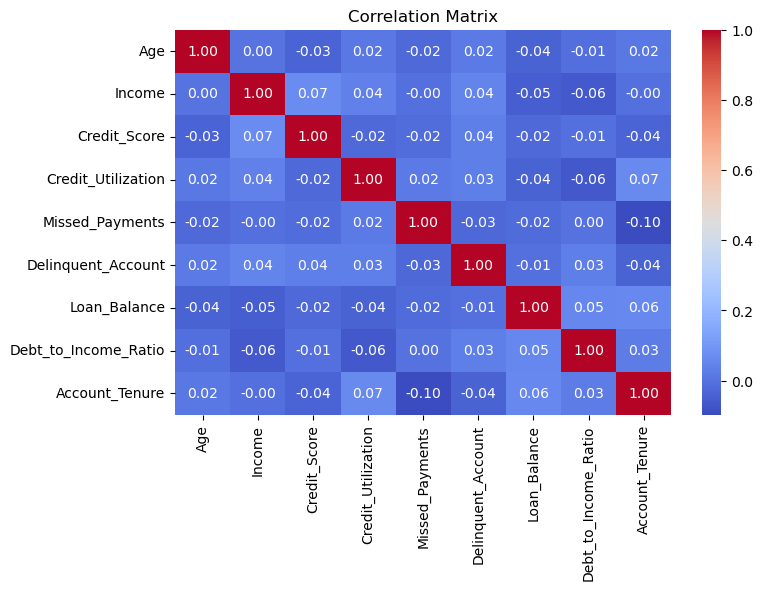

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")

In [16]:
cat_features = ['Employment_Status', 'Credit_Card_Type', 'Location']

for col in cat_features:
    delinquency_rate = df.groupby(col)['Delinquent_Account'].mean().sort_values(ascending=False)
    print(f"\nDelinquency Rate by {col}:\n{delinquency_rate}")


Delinquency Rate by Employment_Status:
Employment_Status
Unemployed       0.193548
Employed         0.182927
Self-employed    0.162500
employed         0.155844
EMP              0.148148
retired          0.114943
Name: Delinquent_Account, dtype: float64

Delinquency Rate by Credit_Card_Type:
Credit_Card_Type
Business    0.212963
Student     0.178571
Gold        0.144068
Standard    0.127907
Platinum    0.118421
Name: Delinquent_Account, dtype: float64

Delinquency Rate by Location:
Location
Los Angeles    0.196262
Houston        0.168421
Phoenix        0.165049
Chicago        0.145631
New York       0.119565
Name: Delinquent_Account, dtype: float64
